1. Yusuf Seha Guney (230611011)
2. Eren Bal (220611040)
3. Barkin Gumus (220611004)

For the images: https://drive.google.com/drive/folders/1m4GiriGzzeVRiTKMU5PFz1XrTja-b8EI

#IMPORTING LIBRARIES


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os


In [3]:
image_files = ["NightImageSeha.jpg", "NightImageEren.jpg", "NightImageBarkin.jpg"]

# Helper Functions

Helper functions break the code into smaller, reusable pieces that perform specific tasks. These functions improve the readability of the code and avoid redundant lines of code when common operations are required

In [4]:
def plot_histograms(image, title="Image"):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    cum_hist = np.cumsum(hist)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'{title}'), plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.plot(hist, color='black')
    plt.title('Histogram')

    plt.subplot(1, 3, 3)
    plt.plot(cum_hist, color='red')
    plt.title('Cumulative Histogram')
    plt.show()

# Histogram Equalization Function


Histogram equalization is a basic image processing technique used to improve the contrast of an image. It works by converting the pixel intensity distribution (histogram) of an image into a more balanced distribution.

In [5]:
def apply_histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    return cv2.cvtColor(equalized, cv2.COLOR_GRAY2BGR)

# CLAHE Function (Contrast Limited Adaptive Histogram Equalization)

CLAHE is an advanced histogram equalization technique that addresses some limitations of standard histogram equalization. While traditional histogram equalization applies transformation globally to the entire image, CLAHE operates on small regions (tiles) of the image and enhances local contrast.

In [6]:
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_img = clahe.apply(gray)
    return cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2BGR)


# Gamma Correction

Gamma correction is a nonlinear operation used to encode and decode luminance in imaging systems. It's a critical technique in image processing that compensates for the nonlinear way in which humans perceive light and dark.

In [7]:
def apply_custom_transformation(image, gamma=1.5):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    transformed_image = cv2.LUT(image, table)
    return transformed_image


# Operate on Images

Processing: NightImageSeha.jpg


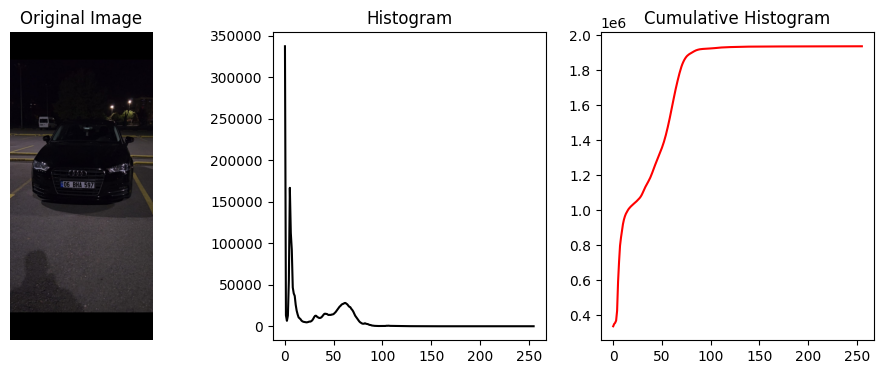

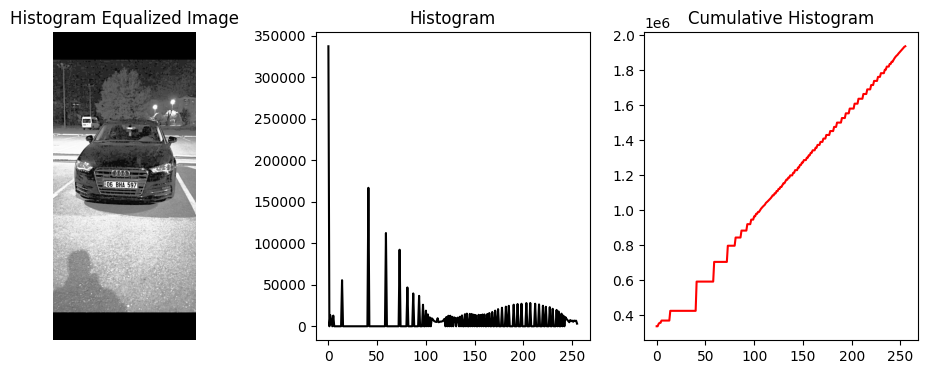

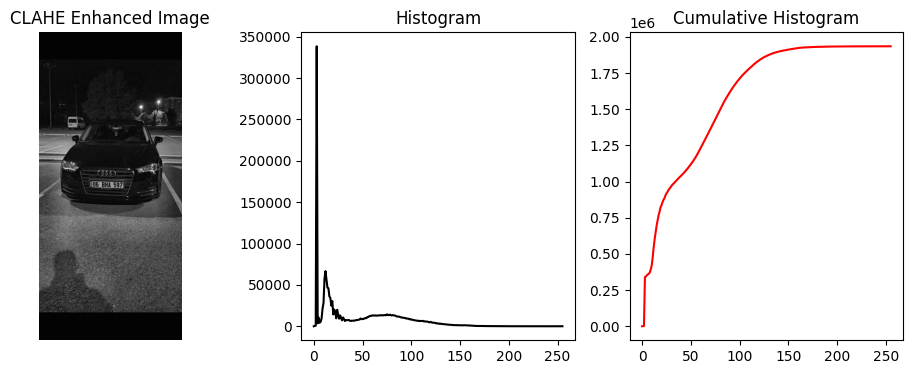

Processing: NightImageEren.jpg


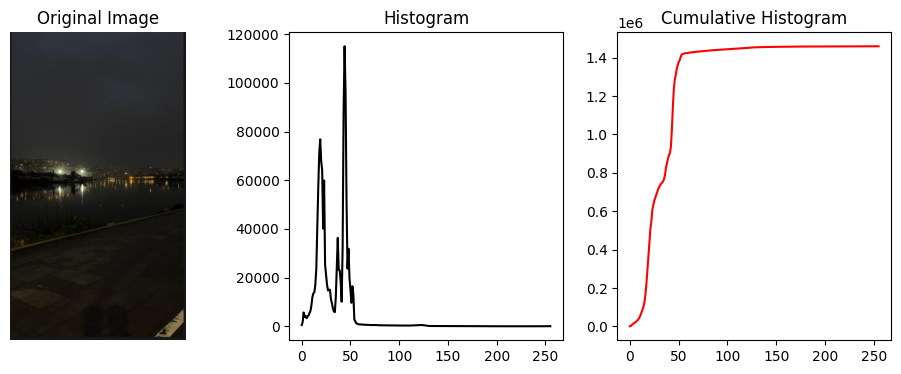

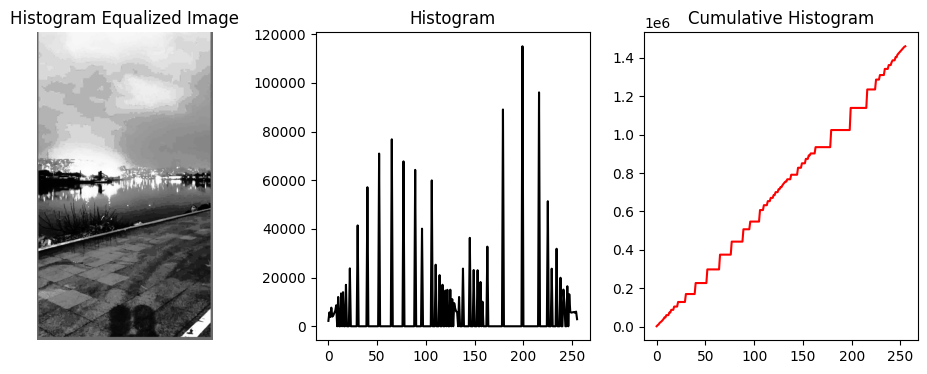

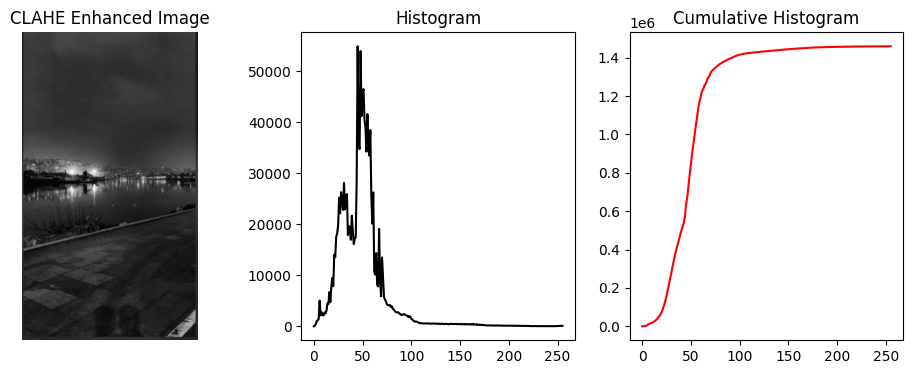

Processing: NightImageBarkin.jpg


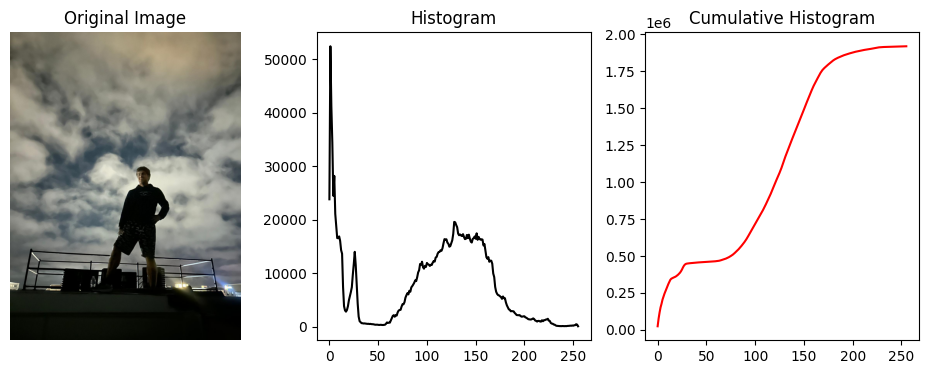

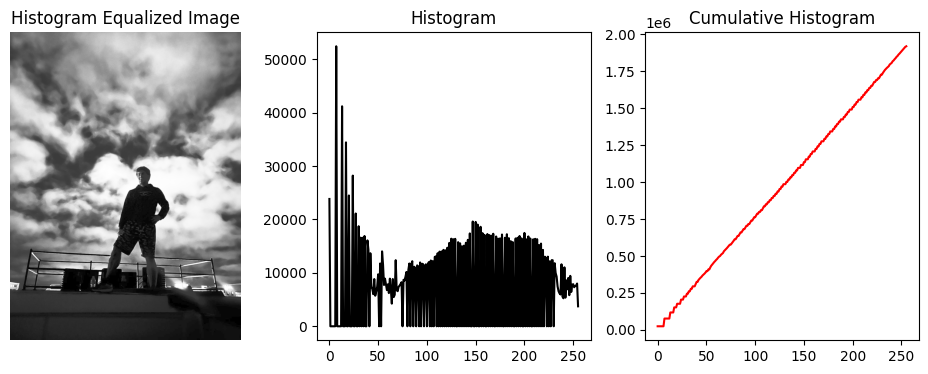

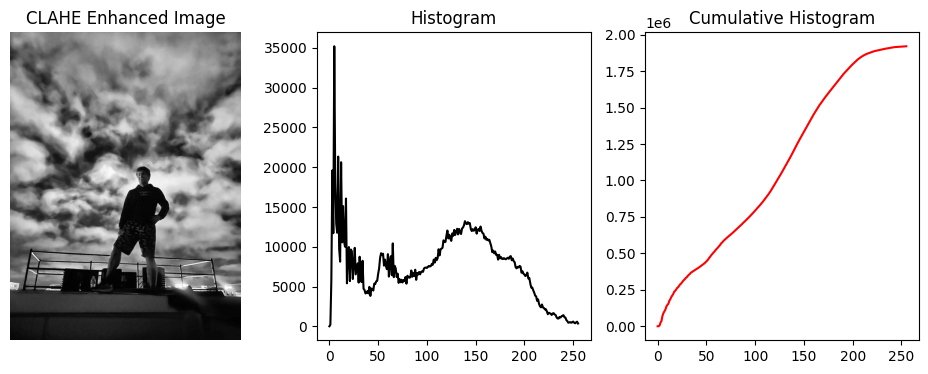

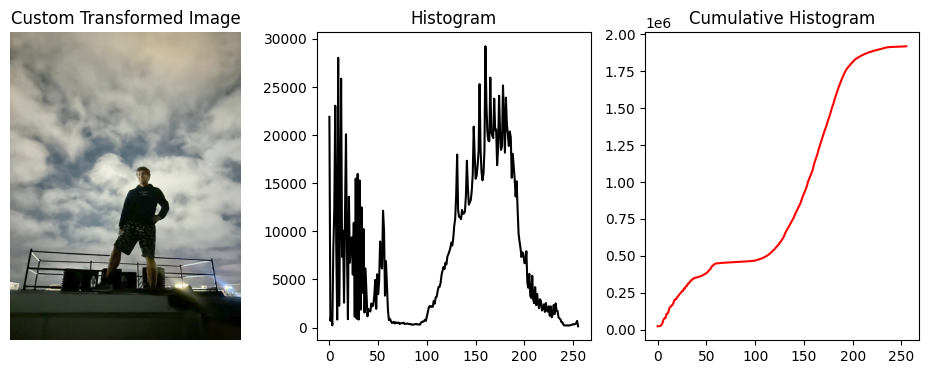

All images processed!


In [8]:
for i, img_file in enumerate(image_files):
    print(f"Processing: {img_file}")
    # No folder path needed, images are directly in the current directory
    image = cv2.imread(img_file)

    if image is None:
        print(f"Failed to load image: {img_file}")
        continue

    # Original image and histograms
    plot_histograms(image, title="Original Image")

    # Method 1: Histogram Equalization
    enhanced_image_eq = apply_histogram_equalization(image)
    plot_histograms(enhanced_image_eq, title="Histogram Equalized Image")

    # Method 2: CLAHE
    enhanced_image_clahe = apply_clahe(image)
    plot_histograms(enhanced_image_clahe, title="CLAHE Enhanced Image")

    # Gamma Correction Application - Step 2
    if i == 2:
      custom_transformed_image = apply_custom_transformation(image)
      plot_histograms(custom_transformed_image, title="Custom Transformed Image")

print("All images processed!")


#REFERENCES

*    Gemini - https://gemini.google.com/app


*    ChatGPT - https://chatgpt.com/
*    For Histogram Equalization and CLAHE - https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html?utm_source=chatgpt.com

*    For Gamma Correction - https://pyimagesearch.com/2015/10/05/opencv-gamma-correction/?utm_source=chatgpt.com